In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Names of sheets in excel data file
sheets = ['ACCESS','STORES','RESTAURANTS','ASSISTANCE','INSECURITY','TAXES','LOCAL','HEALTH','SOCIOECONOMIC']

#Number of sheets as a range
num_sheets=range(len(sheets))

#Store each sheet as a dataframe in a dictionary
#The key is the name of the sheet in lower case. The value is the contents of the sheet stored as a dataframe
fea_dict={}
keys = [sheets[i].lower() for i in num_sheets]
for i in num_sheets:
    fea_dict[keys[i]]=pd.read_excel('data/FoodEnvironmentAtlas.xlsx',sheet_name=sheets[i],converters={'FIPS': str}) 

#conveert FIPS to string so that leading zero remains



In [3]:
#Join dataframes into one using an inner join. Join on the columns: FIPS, State, County
fea = fea_dict[keys[0]]
i=1 #initialize counter
while i<len(num_sheets):
    fea = pd.merge(fea, fea_dict[keys[i]], on=['FIPS','State','County'], how='inner')
    i+=1

In [4]:
#Make a copy of the single joined dataframe
fea_data=fea.copy()

In [5]:
# Select columns that are percentages because they are already normalized with respecct to county population. 
# This will also prevent redundant informaiton. Colunms that were from date after target variable year were
# not included, with the exception of poverty rates as there was no similar variable
columns=['FIPS',
'PCT_LACCESS_POP10',
'PCT_LACCESS_LOWI10',
'PCT_LACCESS_HHNV10',
'PCT_LACCESS_SNAP15',
'PCT_LACCESS_CHILD10',
'PCT_LACCESS_SENIORS10',
'GROCPTH11',
'SUPERCPTH11',
'CONVSPTH11',
'SPECSPTH11',
'SNAPSPTH12',
'WICSPTH11',
'FFRPTH11',
'FSRPTH11',
'PC_FFRSALES07',
'PC_FFRSALES12',
'PC_FSRSALES07',
'PC_FSRSALES12',
'REDEMP_SNAPS12',
'PCT_SNAP12',
'PC_SNAPBEN12',
'SNAP_PART_RATE11',
'PCT_NSLP12',
'PCT_FREE_LUNCH10',
'PCT_REDUCED_LUNCH10',
'PCT_SBP12',
'PCT_SFSP12',
'PC_WIC_REDEMP11',
'REDEMP_WICS11',
'PCT_WIC12',
'PCT_CACFP12',
'FOODINSEC_12_14',
'VLFOODSEC_12_14',
'PCT_LOCLFARM07',
'PCT_LOCLFARM12',
'PCT_LOCLSALE07',
'PCT_LOCLSALE12',
'PC_DIRSALES07',
'PC_DIRSALES12',
'PCH_PC_DIRSALES_07_12',
'FMRKTPTH13',
'VEG_ACRESPTH07',
'VEG_ACRESPTH12',
'PCH_VEG_ACRESPTH_07_12',
'FRESHVEG_ACRESPTH07',
'FRESHVEG_ACRESPTH12',
'PCH_FRESHVEG_ACRESPTH_07_12',
'ORCHARD_ACRESPTH07',
'ORCHARD_ACRESPTH12',
'PCH_ORCHARD_ACRESPTH_07_12',
'BERRY_ACRESPTH07',
'BERRY_ACRESPTH12',
'PCH_BERRY_ACRESPTH_07_12',
'GHVEG_SQFTPTH07',
'GHVEG_SQFTPTH12',
'PCH_GHVEG_SQFTPTH_07_12',
'RECFACPTH11',
'PCT_NHWHITE10',
'PCT_NHBLACK10',
'PCT_HISP10',
'PCT_NHASIAN10',
'PCT_NHNA10',
'PCT_NHPI10',
'PCT_65OLDER10',
'PCT_18YOUNGER10',
'MEDHHINC15',
'POVRATE15',
'CHILDPOVRATE15',
'PCT_DIABETES_ADULTS13']

In [6]:
#subset dataframe
fea_data_sub=fea_data[columns] 

In [7]:
fea_data_sub.PCT_DIABETES_ADULTS13

0       13.0
1       10.4
2       18.4
3       14.8
4       14.1
        ... 
3138     8.1
3139     4.8
3140     9.0
3141    12.0
3142    10.0
Name: PCT_DIABETES_ADULTS13, Length: 3143, dtype: float64

In [8]:
fea_data_sub.shape

(3143, 70)

In [9]:
# Choose numerical columns
fea_data_sub_numeric=fea_data_sub.select_dtypes([np.number])

In [10]:
 # Create correlation matrix
corrmatrix=fea_data_sub_numeric.corr()

In [11]:
corrmatrix

,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_HHNV10,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,GROCPTH11,SUPERCPTH11,CONVSPTH11,SPECSPTH11,...,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,CHILDPOVRATE15,PCT_DIABETES_ADULTS13
PCT_LACCESS_POP10,1.000000,0.901991,0.120353,0.469834,0.960294,0.919663,0.336424,-0.114098,0.141654,-0.045043,...,0.080380,-0.029079,0.157304,-0.010990,0.170400,0.024031,0.083173,-0.111678,-0.115664,-0.184580
PCT_LACCESS_LOWI10,0.901991,1.000000,0.278653,0.625093,0.890419,0.826792,0.312603,-0.099019,0.205566,-0.100324,...,0.125123,-0.104286,0.263290,-0.018282,0.170309,0.071601,-0.175580,0.149489,0.142085,-0.032667
PCT_LACCESS_HHNV10,0.120353,0.278653,1.000000,0.469096,0.162711,0.043476,0.112428,-0.072707,0.083795,-0.123568,...,-0.118316,-0.119366,0.459477,-0.026078,-0.054357,0.083322,-0.348824,0.430246,0.431192,0.268348
PCT_LACCESS_SNAP15,0.469834,0.625093,0.469096,1.000000,0.514461,0.350932,0.127557,-0.005639,0.100199,-0.107596,...,0.136538,-0.085277,0.468196,-0.010444,-0.035277,0.183683,-0.287963,0.373430,0.368432,0.136373
PCT_LACCESS_CHILD10,0.960294,0.890419,0.162711,0.514461,1.000000,0.823572,0.291381,-0.093925,0.107640,-0.056868,...,0.120058,-0.018676,0.243110,-0.008160,0.046794,0.215924,0.110346,-0.099466,-0.111107,-0.196180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCT_18YOUNGER10,0.024031,0.071601,0.083322,0.183683,0.215924,-0.142778,-0.110478,0.050706,-0.089650,-0.092104,...,0.308860,-0.012262,0.291096,-0.104604,-0.528833,1.000000,0.145593,-0.008683,-0.009211,-0.057354
MEDHHINC15,0.083173,-0.175580,-0.348824,-0.287963,0.110346,-0.008592,-0.050280,-0.049254,-0.294468,0.190558,...,0.036969,0.431306,-0.083894,0.102030,-0.291583,0.145593,1.000000,-0.783640,-0.814689,-0.575257
POVRATE15,-0.111678,0.149489,0.430246,0.373430,-0.099466,-0.122713,-0.054436,0.025516,0.189015,-0.196037,...,0.087124,-0.156139,0.201709,-0.045336,-0.074526,-0.008683,-0.783640,1.000000,0.938094,0.530610
CHILDPOVRATE15,-0.115664,0.142085,0.431192,0.368432,-0.111107,-0.088569,-0.023757,0.024937,0.245006,-0.193537,...,0.077605,-0.211627,0.157403,-0.053166,0.069784,-0.009211,-0.814689,0.938094,1.000000,0.607158


In [12]:
# Iterate through corrmatrix to get column pairs with correlation above threshold of 0.9
# Display these pairs


iters = range(len(corrmatrix.columns) - 1)
drop_cols = []

for i in iters:
        for j in range(i+1):
            item = corrmatrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= 0.9:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

PCT_LACCESS_LOWI10 | PCT_LACCESS_POP10 | 0.9
PCT_LACCESS_CHILD10 | PCT_LACCESS_POP10 | 0.96
PCT_LACCESS_SENIORS10 | PCT_LACCESS_POP10 | 0.92
PC_FSRSALES12 | PC_FSRSALES07 | 0.91
VEG_ACRESPTH12 | VEG_ACRESPTH07 | 1.0
FRESHVEG_ACRESPTH12 | FRESHVEG_ACRESPTH07 | 0.95
ORCHARD_ACRESPTH12 | ORCHARD_ACRESPTH07 | 0.97
BERRY_ACRESPTH12 | BERRY_ACRESPTH07 | 0.98
CHILDPOVRATE15 | POVRATE15 | 0.94


In [13]:
# List column to drop from each pair
drops=['PCT_LACCESS_LOWI10','PCT_LACCESS_CHILD10','PCT_LACCESS_SENIORS10','PC_FSRSALES07','VEG_ACRESPTH07','FRESHVEG_ACRESPTH07','ORCHARD_ACRESPTH07','BERRY_ACRESPTH07','CHILDPOVRATE15']

In [14]:
# Drop columns from dataframe
fea_data_sub_numeric=fea_data_sub_numeric.drop(columns=drops)

In [15]:
# Display dataframe with only selected columns 
fea_data_sub_numeric

,PCT_LACCESS_POP10,PCT_LACCESS_HHNV10,PCT_LACCESS_SNAP15,GROCPTH11,SUPERCPTH11,CONVSPTH11,SPECSPTH11,SNAPSPTH12,WICSPTH11,FFRPTH11,...,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PCT_DIABETES_ADULTS13
0,33.769657,3.284786,4.608749,0.090581,0.018116,0.561604,0.018116,0.674004,0.090567,0.615953,...,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,13.0
1,19.318473,2.147827,1.298900,0.144746,0.032166,0.573622,0.107219,0.725055,0.139380,0.648675,...,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,10.4
2,20.840972,4.135869,4.303147,0.219370,0.000000,0.804358,0.109685,1.280590,0.255942,0.694673,...,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,18.4
3,4.559753,3.458580,0.676710,0.263794,0.043966,0.835348,0.000000,0.719122,0.263771,0.263794,...,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,14.8
4,2.700840,3.269380,0.812727,0.121608,0.017373,0.521177,0.017373,0.657144,0.139000,0.347451,...,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,30.570505,0.877134,2.141828,0.113603,0.022721,0.636176,0.022721,0.428936,0.090948,0.568014,...,0.947359,15.269598,0.739625,0.723645,0.093594,8.316212,27.094462,71867.0,8.5,8.1
3139,29.174527,1.374848,0.670815,0.232818,0.000000,0.605327,0.279382,0.242215,0.140095,1.257217,...,0.150277,14.985442,1.070724,0.356908,0.061050,9.852541,19.141542,83290.0,6.6,4.8
3140,20.220414,0.966219,2.072485,0.143548,0.047849,0.574190,0.095698,0.554895,0.143589,0.909134,...,0.227294,8.783976,0.279383,0.582442,0.161000,8.873946,30.168577,62968.0,9.8,9.0
3141,10.915407,0.396304,1.053980,0.236407,0.000000,0.472813,0.000000,0.669502,0.236742,0.827423,...,0.257823,13.617719,0.539084,0.597680,0.011719,17.672565,25.454119,56088.0,11.2,12.0


In [16]:
import seaborn as sns

sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split

# Importing all of the classifiers we learned about
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Some of these need scaling first to work well 
# We will also see how polynomial features can give us nonlinear decision boundaries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# We will just use accuracy score for model comparison
from sklearn.metrics import accuracy_score

In [17]:
fea_data_sub_numeric['log_MEDHHINC15'] = np.log10(fea_data_sub_numeric.MEDHHINC15.values)

In [18]:
FEA_df = fea_data_sub_numeric.drop(columns='MEDHHINC15')

In [19]:
further_drops = ['PC_WIC_REDEMP11',
                 'PCH_VEG_ACRESPTH_07_12',
                 'FRESHVEG_ACRESPTH12',
                 'PCH_FRESHVEG_ACRESPTH_07_12',
                 'PCH_ORCHARD_ACRESPTH_07_12',
                 'BERRY_ACRESPTH12',
                 'PCH_BERRY_ACRESPTH_07_12',
                 'GHVEG_SQFTPTH07',
                 'GHVEG_SQFTPTH12',
                 'PCH_GHVEG_SQFTPTH_07_12'       
]

In [20]:
FEA_df = FEA_df.drop(columns=further_drops)

In [21]:
FEA_df

,PCT_LACCESS_POP10,PCT_LACCESS_HHNV10,PCT_LACCESS_SNAP15,GROCPTH11,SUPERCPTH11,CONVSPTH11,SPECSPTH11,SNAPSPTH12,WICSPTH11,FFRPTH11,...,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,POVRATE15,PCT_DIABETES_ADULTS13,log_MEDHHINC15
0,33.769657,3.284786,4.608749,0.090581,0.018116,0.561604,0.018116,0.674004,0.090567,0.615953,...,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,12.7,13.0,4.752663
1,19.318473,2.147827,1.298900,0.144746,0.032166,0.573622,0.107219,0.725055,0.139380,0.648675,...,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,12.9,10.4,4.719224
2,20.840972,4.135869,4.303147,0.219370,0.000000,0.804358,0.109685,1.280590,0.255942,0.694673,...,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,32.0,18.4,4.497386
3,4.559753,3.458580,0.676710,0.263794,0.043966,0.835348,0.000000,0.719122,0.263771,0.263794,...,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,22.2,14.8,4.610309
4,2.700840,3.269380,0.812727,0.121608,0.017373,0.521177,0.017373,0.657144,0.139000,0.347451,...,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,14.7,14.1,4.703180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,30.570505,0.877134,2.141828,0.113603,0.022721,0.636176,0.022721,0.428936,0.090948,0.568014,...,0.947359,15.269598,0.739625,0.723645,0.093594,8.316212,27.094462,8.5,8.1,4.856530
3139,29.174527,1.374848,0.670815,0.232818,0.000000,0.605327,0.279382,0.242215,0.140095,1.257217,...,0.150277,14.985442,1.070724,0.356908,0.061050,9.852541,19.141542,6.6,4.8,4.920593
3140,20.220414,0.966219,2.072485,0.143548,0.047849,0.574190,0.095698,0.554895,0.143589,0.909134,...,0.227294,8.783976,0.279383,0.582442,0.161000,8.873946,30.168577,9.8,9.0,4.799120
3141,10.915407,0.396304,1.053980,0.236407,0.000000,0.472813,0.000000,0.669502,0.236742,0.827423,...,0.257823,13.617719,0.539084,0.597680,0.011719,17.672565,25.454119,11.2,12.0,4.748870


In [22]:
FEA_df_clean = FEA_df.dropna()
FEA_df_clean.shape

(1790, 50)

Text(0, 0.5, 'Diabetes Rate')

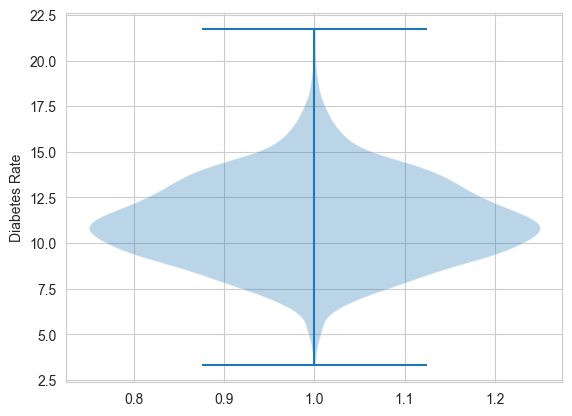

In [23]:
plt.violinplot(FEA_df_clean.PCT_DIABETES_ADULTS13)
plt.ylabel("Diabetes Rate")

In [24]:
np.std(FEA_df_clean.PCT_DIABETES_ADULTS13) #2.39

2.3875468243224334

In [25]:
np.mean(FEA_df_clean.PCT_DIABETES_ADULTS13) #11.2

11.199776536312848

In [26]:
# High >13.59 # Middle 13.59>x>8.81 Low <8.81

In [27]:
def categorize_health(h):
    if h < 8.81:
        return 0
    elif h >= 8.81 and h <= 13.59:
        return 1
    else:
        return 2

In [28]:
FEA_df_clean.insert(50, "Health", FEA_df_clean['PCT_DIABETES_ADULTS13'].apply(categorize_health), True)

In [29]:
FEA_df_clean

,PCT_LACCESS_POP10,PCT_LACCESS_HHNV10,PCT_LACCESS_SNAP15,GROCPTH11,SUPERCPTH11,CONVSPTH11,SPECSPTH11,SNAPSPTH12,WICSPTH11,FFRPTH11,...,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,POVRATE15,PCT_DIABETES_ADULTS13,log_MEDHHINC15,Health
0,33.769657,3.284786,4.608749,0.090581,0.018116,0.561604,0.018116,0.674004,0.090567,0.615953,...,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,12.7,13.0,4.752663,1
1,19.318473,2.147827,1.298900,0.144746,0.032166,0.573622,0.107219,0.725055,0.139380,0.648675,...,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,12.9,10.4,4.719224,1
2,20.840972,4.135869,4.303147,0.219370,0.000000,0.804358,0.109685,1.280590,0.255942,0.694673,...,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,32.0,18.4,4.497386,2
4,2.700840,3.269380,0.812727,0.121608,0.017373,0.521177,0.017373,0.657144,0.139000,0.347451,...,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,14.7,14.1,4.703180,2
5,37.474652,7.285561,6.016623,0.187354,0.000000,0.187354,0.093677,1.368468,0.187319,0.374707,...,7.119296,0.183251,0.183251,0.036650,13.459776,22.264981,39.6,19.6,4.451034,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,54.111135,1.692551,4.592067,0.252398,0.000000,0.946492,0.063099,0.606409,0.126318,0.315497,...,16.795719,0.648410,0.761725,0.081838,12.867485,23.613472,11.4,8.2,4.779661,0
3126,15.366399,1.455699,1.157798,0.197433,0.024679,0.592300,0.098717,0.593935,0.222162,0.493583,...,5.642649,0.376343,20.000997,0.017446,14.468011,25.451736,12.9,9.6,4.719398,1
3131,13.648370,1.397615,0.428007,0.388695,0.000000,0.610806,0.055528,0.695952,0.277639,0.666334,...,4.313487,0.303767,0.695902,0.022092,12.377113,28.189550,8.8,8.6,4.794934,0
3134,21.079489,0.629671,0.732993,0.105094,0.035031,0.770686,0.105094,0.508095,0.140617,0.735655,...,4.839567,0.581457,0.492820,0.088637,17.521716,20.957277,9.6,8.0,4.744504,0


In [30]:
FEA_df_clean=FEA_df_clean.drop(columns="PCT_DIABETES_ADULTS13")

In [31]:
FEA_df_clean.shape

(1790, 50)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [33]:
FEA_df_clean_train, FEA_df_clean_test = train_test_split(FEA_df_clean.copy(), shuffle=True, random_state=215,
                                                         test_size =0.2)

In [34]:
FEA_df_clean_tt, FEA_df_clean_val = train_test_split(FEA_df_clean_train.copy(), shuffle=True, random_state=215,
                                                         test_size =0.2)

feature_s_ = FEA_df_clean_tt.columns[:-1]

target_s = ['Health']

In [35]:
feature_s_

Index(['PCT_LACCESS_POP10', 'PCT_LACCESS_HHNV10', 'PCT_LACCESS_SNAP15',
       'GROCPTH11', 'SUPERCPTH11', 'CONVSPTH11', 'SPECSPTH11', 'SNAPSPTH12',
       'WICSPTH11', 'FFRPTH11', 'FSRPTH11', 'PC_FFRSALES07', 'PC_FFRSALES12',
       'PC_FSRSALES12', 'REDEMP_SNAPS12', 'PCT_SNAP12', 'PC_SNAPBEN12',
       'SNAP_PART_RATE11', 'PCT_NSLP12', 'PCT_FREE_LUNCH10',
       'PCT_REDUCED_LUNCH10', 'PCT_SBP12', 'PCT_SFSP12', 'REDEMP_WICS11',
       'PCT_WIC12', 'PCT_CACFP12', 'FOODINSEC_12_14', 'VLFOODSEC_12_14',
       'PCT_LOCLFARM07', 'PCT_LOCLFARM12', 'PCT_LOCLSALE07', 'PCT_LOCLSALE12',
       'PC_DIRSALES07', 'PC_DIRSALES12', 'PCH_PC_DIRSALES_07_12', 'FMRKTPTH13',
       'VEG_ACRESPTH12', 'ORCHARD_ACRESPTH12', 'RECFACPTH11', 'PCT_NHWHITE10',
       'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10',
       'PCT_NHPI10', 'PCT_65OLDER10', 'PCT_18YOUNGER10', 'POVRATE15',
       'log_MEDHHINC15'],
      dtype='object')

In [36]:
classifiers = {
    # Putting linear decision boundary classifiers first
    'lda' : LinearDiscriminantAnalysis(),
    'log_reg' : LogisticRegression(penalty=None, max_iter= 100000),
     'svc_linear' : LinearSVC(dual = 'auto'),

    # Quadratic boundaries
    'qda' : QuadraticDiscriminantAnalysis(),
    'lda_poly' : Pipeline([('scale', StandardScaler()),('poly',PolynomialFeatures(2)),('lda', LinearDiscriminantAnalysis())]),
    'log_reg_poly' : Pipeline([('scale', StandardScaler()),('poly',PolynomialFeatures(2)),('log_reg', LogisticRegression(penalty=None, max_iter= 100000))]),
    'gnb' : GaussianNB(),

    # Complex boundaries
    'knn' : Pipeline([('scale', StandardScaler()),('knn', KNeighborsClassifier())]),   
    'svc_rbf' : Pipeline([('scale', StandardScaler()),('svc',SVC(kernel= 'rbf'))])
}

In [37]:
for model_name, model in classifiers.items():
    model.fit(FEA_df_clean_tt[feature_s_], FEA_df_clean_tt[target_s])

accs = {model_name: accuracy_score(FEA_df_clean_val[target_s], model.predict(FEA_df_clean_val[feature_s_])) for model_name, model in classifiers.items()}

accs

C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EX

{'lda': 0.794425087108014,
 'log_reg': 0.7735191637630662,
 'svc_linear': 0.7003484320557491,
 'qda': 0.7003484320557491,
 'lda_poly': 0.47038327526132406,
 'log_reg_poly': 0.7421602787456446,
 'gnb': 0.5574912891986062,
 'knn': 0.7804878048780488,
 'svc_rbf': 0.794425087108014}

In [38]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [41]:
for model_name, model in classifiers.items():
    model.fit(FEA_df_clean_tt[feature_s_], FEA_df_clean_tt[target_s])

precs = {model_name: precision_score(FEA_df_clean_val[target_s], model.predict(FEA_df_clean_val[feature_s_]), average='macro') for model_name, model in classifiers.items()}

precs

C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EX

{'lda': 0.7831654954237002,
 'log_reg': 0.8001344215847258,
 'svc_linear': 0.8002136752136751,
 'qda': 0.6661856661856662,
 'lda_poly': 0.4577906370359201,
 'log_reg_poly': 0.6839263966923541,
 'gnb': 0.5406681190994916,
 'knn': 0.7455369192211297,
 'svc_rbf': 0.8011763279165655}

In [45]:
for model_name, model in classifiers.items():
    model.fit(FEA_df_clean_tt[feature_s_], FEA_df_clean_tt[target_s])

precs = {model_name: precision_score(FEA_df_clean_val[target_s], model.predict(FEA_df_clean_val[feature_s_]), average='weighted') for model_name, model in classifiers.items()}

precs

C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EX

{'lda': 0.7984237885971868,
 'log_reg': 0.78973830911675,
 'svc_linear': 0.7458679531850264,
 'qda': 0.7471479353012455,
 'lda_poly': 0.6132362148403172,
 'log_reg_poly': 0.74518128554751,
 'gnb': 0.6475731213894772,
 'knn': 0.7785634684406003,
 'svc_rbf': 0.7989260551626339}

In [43]:
for model_name, model in classifiers.items():
    model.fit(FEA_df_clean_tt[feature_s_], FEA_df_clean_tt[target_s])

recs = {model_name: recall_score(FEA_df_clean_val[target_s], model.predict(FEA_df_clean_val[feature_s_]), average='macro') for model_name, model in classifiers.items()}

recs

C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EX

{'lda': 0.6882833571315247,
 'log_reg': 0.6148384774039225,
 'svc_linear': 0.4149245170187579,
 'qda': 0.6948095534482969,
 'lda_poly': 0.528310694541061,
 'log_reg_poly': 0.6539468385018123,
 'gnb': 0.6209192203956602,
 'knn': 0.6743095473461965,
 'svc_rbf': 0.6439729554912802}

In [44]:
for model_name, model in classifiers.items():
    model.fit(FEA_df_clean_tt[feature_s_], FEA_df_clean_tt[target_s])

recs = {model_name: recall_score(FEA_df_clean_val[target_s], model.predict(FEA_df_clean_val[feature_s_]), average='weighted') for model_name, model in classifiers.items()}

recs

C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\squis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EX

{'lda': 0.794425087108014,
 'log_reg': 0.7735191637630662,
 'svc_linear': 0.7003484320557491,
 'qda': 0.7003484320557491,
 'lda_poly': 0.47038327526132406,
 'log_reg_poly': 0.7421602787456446,
 'gnb': 0.5574912891986062,
 'knn': 0.7804878048780488,
 'svc_rbf': 0.794425087108014}